<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#План-работ" data-toc-modified-id="План-работ-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>План работ</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Знакомство-с-данными-и-их-первичный-анализ" data-toc-modified-id="Знакомство-с-данными-и-их-первичный-анализ-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Знакомство с данными и их первичный анализ</a></span></li><li><span><a href="#Предварительные-выводы" data-toc-modified-id="Предварительные-выводы-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Предварительные выводы</a></span></li><li><span><a href="#План-работы" data-toc-modified-id="План-работы-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>План работы</a></span></li></ul></li><li><span><a href="#Анализ-данных-и-разработка-модели" data-toc-modified-id="Анализ-данных-и-разработка-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных и разработка модели</a></span><ul class="toc-item"><li><span><a href="#Разведочный-анализ-данных-(EDA)" data-toc-modified-id="Разведочный-анализ-данных-(EDA)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Разведочный анализ данных (EDA)</a></span></li><li><span><a href="#Feature-engineering" data-toc-modified-id="Feature-engineering-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Feature engineering</a></span></li><li><span><a href="#Оценка-корреляции-и-отбор-показателей" data-toc-modified-id="Оценка-корреляции-и-отбор-показателей-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Оценка корреляции и отбор показателей</a></span></li><li><span><a href="#Исследование-моделей-и-подбор-гиперпараметров" data-toc-modified-id="Исследование-моделей-и-подбор-гиперпараметров-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Исследование моделей и подбор гиперпараметров</a></span><ul class="toc-item"><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#LGBMClassifier" data-toc-modified-id="LGBMClassifier-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>LGBMClassifier</a></span></li><li><span><a href="#CatBoostClassifier" data-toc-modified-id="CatBoostClassifier-2.4.4"><span class="toc-item-num">2.4.4&nbsp;&nbsp;</span>CatBoostClassifier</a></span></li></ul></li></ul></li><li><span><a href="#Отчет" data-toc-modified-id="Отчет-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Отчет</a></span></li></ul></div>

# Прогноз оттока клиентов

Оператору связи требуется разработка модели прогнозирования оттока клиентов. Если модель спрогнозирует, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала и предоставила персональные данные о некоторых клиентах (информацию об их тарифах и договорах) для построения и обучения модели. 

**Цель проекта:** разработать прогностическую модель оттока клиентов.

Для реализации поставленной цели нам необходимо решить следующие **задачи**:
- поиск и сбор информации (данные предоставлены клиентом)
- загрузка, первичное знакомство и анализ данных
- исследовательский анализ данных с выявлением закономерностей и зависимостей в данных, построение гипотез, поиск наилучших признаков для модели
- подготовка данных для модели (feature engineering, кодирование и масштабирование признаков, pipeline)
- построение моделей с поиском наилучших гиперпараметров
- анализ полученных моделей, выбор наилучшей и ее проверка на тестовых данных
- подготовка отчета для заказчика о результатах проведенного исследования

Согласно техническому заданию для оценки и обучения моделей необходимо использовать метрику **ROC-AUC**, дополнительно применять *Accuracy* и *F1*. Построенная модель должна иметь метрику **ROC-AUC >= 0.85**.

## План работ

Данный раздел посвящен первичному знакомству с данными и составлению плана предстоящих работ.    

Выполним следующие пункты:
- загрузка данных
- первичное знакомство с данными и их анализ
- предварительные выводы
- план работы

### Загрузка данных

In [ ]:
# загружаем необходимые библиотеки

!pip install skimpy
!pip install catboost
!pip install lightgbm
!pip install imblearn
!pip install phik 
!pip install numpy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import phik

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import mutual_info_classif, SelectKBest

from catboost import CatBoostClassifier

from lightgbm import LGBMClassifier

from imblearn.pipeline import make_pipeline
from imblearn.combine import SMOTETomek

from phik.report import plot_correlation_matrix

from skimpy import clean_columns


In [ ]:
RANDOM_STATE = 270323
warnings.filterwarnings("ignore")

model_list = []
roc_auc_score_list = []
accuracy_score_list = []
f1_score_list = []
best_params = []

In [ ]:
try:
    contract = pd.read_csv('/datasets/final_provider/contract.csv')
    personal = pd.read_csv('/datasets/final_provider/personal.csv')
    internet = pd.read_csv('/datasets/final_provider/internet.csv')
    phone = pd.read_csv('/datasets/final_provider/phone.csv')
except:
    contract = pd.read_csv('/Users/amirk/Downloads/final_provider/final_provider/contract.csv')
    personal = pd.read_csv('/Users/amirk/Downloads/final_provider/final_provider/personal.csv')
    internet = pd.read_csv('/Users/amirk/Downloads/final_provider/final_provider/internet.csv')
    phone = pd.read_csv('/Users/amirk/Downloads/final_provider/final_provider/phone.csv')
    

### Знакомство с данными и их первичный анализ

In [ ]:
def get_info(df):
    display(df.head())
    display(df.info())
    display(df.describe(include='all'))

In [ ]:
get_info(contract)

В датасете **contract** имеются данные о 7043 уникальных пользователях. Обозначение признаков не соответствует "змеиному" регистру. Явных пропусков в данных нет. Почти все признаки, кроме *MonthlyCharges*, имеют тип данных *object*, что не соответсвует реальному типу данных (есть и даты, и числовые признаки, поэтому потребуется правильное назначенbе типа данных). Таргетом в нашем случае выступает столбец *EndDate* (требуется дополнительная кодировка, т.к. часть значений имеют запись в виде даты). Категориальные признаки имеют от 2 до 4 вариантов значений признака, что также требует дополнительной кодировки.

In [ ]:
get_info(personal)

В датасете **personal** также имеются данные о 7043 уникальных пользователях (нужно будет проверить, что это те же самые пользователи). Обозначение признаков так же не соответствует "змеиному" регистру. Типы данных в столбцах соответствуют реальному типу данных (однако категориальный признак *SeniorCitizen* для меньшей путанницы можно было бы заменить на тип *object*. Категориальные признаки имеют 2 варианта значений признака.

In [ ]:
get_info(internet)

В датасете **internet** представлены данные о 5517 уникальных пользователях (вероятно часть пользователей не имела данную услугу). Обозначение признаков так же не соответствует "змеиному" регистру. Типы данных в столбцах соответствуют реальному типу данных. Категориальные признаки имеют 2 варианта значений признака. 

In [ ]:
get_info(phone)

Датафрейм **phone** помимо идентификатора пользователя имеет всего 1 столбец, представлены данные о 6361 уникальных пользователях. Обозначение признаков так же не соответствует "змеиному" регистру. Типы данных в столбцах соответствуют реальному типу данных. 

### Предварительные выводы

В нашем распоряжении 4 датасета, в которых по предварительным данным хранится информация о 7043 уникальных пользователях. Данные на первый взгляд полные, явных пропусков нет. Однако есть некоторые общие "проблемы" в данных, которые придется устранить. 
- обозначение признаков не соответствует "змеиному" регистру
- в датасетах много столбцов с типом данных, несоответствующим реальному типу данных 
- категориальные признаки требуют кодирования 

### План работы

- исследовательский анализ данных с выявлением закономерностей и зависимостей в данных, построение гипотез, поиск наилучших признаков для модели (планирую делать графики в разрезе таргета, т.е. для действующих пользователей и ушедших пользователей, проверка корреляции, мультиколлинеарности)
- подготовка данных для модели (разделение test/train, feature engineering, кодирование и масштабирование признаков, pipeline)
- построение моделей с поиском наилучших гиперпараметров (применение кроссвалидации, планирую использовать модель случайного леса, бустинги, возможно получится нейросеть)
- анализ полученных моделей, выбор наилучшей и ее проверка на тестовых данных
- подготовка отчета для заказчика о результатах проведенного исследования

## Анализ данных и разработка модели

Данный раздел проекта посвящен разведывательному анализу данных, подготовке данных к загрузке в модель и непостредственно построению и обучению модели. Основные пункты, которые будут отражены в данном разделе:
- разведочный анализ данных (EDA)
- feature engineering
- оценка корреляции признаков и мультиколлинеарности
- feature selection
- исследование моделей с подбором гиперпараметров
- выбор лучшей модели
- оценка лучшей модели на тестовых данных


### Разведочный анализ данных (EDA)

Объединим таблички в единый датафрейм

In [ ]:
df_list = [personal, internet, phone] # создадим лист с названиями таблиц для масштабируемости кода
data = contract
for df in df_list:
    data = data.merge(df, how='outer', on='customerID')

In [ ]:
data.head()

Приведем названия столбцов к змеиному регистру

In [ ]:
data = clean_columns(data)

In [ ]:
data.info()

Изменим типы данных в соответствии с их реальным типом

В столбце *begin_date* заменим тип данных на *datetime*

In [ ]:
data['begin_date'] = pd.to_datetime(data['begin_date'])

Из столбца *end_date* получим таргет

In [ ]:
data["target"] = (data["end_date"] != "No").astype(int)

In [ ]:
data[['end_date', 'target']].head()

Таргет получен!

Столбец *end_date* нужно привести к формату datetime. Для этого нужно заменить значение 'No' на какую-нибудь дату. Если заменить на дату *begin_date*, то при создании новой фичи - разница между *begin_date* и *end_date* - получим нули, это будет утечка таргета. Заменим на дату выгрузки данных 01.02.2020г, тогда утечки не будет!

In [ ]:
data.loc[data['end_date'] == 'No', 'end_date'] = '2020-02-01 00:00:00'
data['end_date'] = pd.to_datetime(data['end_date'])

In [ ]:
data['end_date'].unique()

Тип изменился, *No* заменены!

Тип данных в столбце *total_charges* заменим на *float*. Рассмотрим данные более подробно

In [ ]:
data['total_charges'].value_counts()

Видно, что есть 11 пустых значений ' '. Посмотрим, что это за пользователи

In [ ]:
data.loc[data['total_charges'] == ' ']

Это пользователи, которые только начали пользоваться услугами оператора, поэтому их *total_charges* по факту равна *monthly_charges*. Исправим!

In [ ]:
data.loc[data['total_charges'] == ' ', 'total_charges'] = data.loc[data['total_charges'] == ' ', 'monthly_charges']

In [ ]:
data['total_charges'].value_counts()

In [ ]:
data['total_charges'] = data['total_charges'].astype(float)

Тип данных в столбце *senior_sitizen* заменим на тип *object*

In [ ]:
data['senior_citizen'] = data['senior_citizen'].astype(object)

Далее идут столбцы из таблицы **internet**. Оценим в них данные и заменим *Nan* на *unknown*

In [ ]:
# напишем функцию для просмотра уникальных значений
def unique_meaning(df, columns):
    for column in columns:
        print(f'Уникальные значения в столбце {column}')
        print(df[column].unique()) 

In [ ]:
# создадим массив с названиями столбцов таблицы *internet*
columns_internet = clean_columns(internet).columns[1:]

In [ ]:
unique_meaning(data, columns_internet)

In [ ]:
# функция для замены NaN
def fill_unknown(df, columns):
    for column in columns:
        df[column].fillna(value='unknown', inplace=True)

In [ ]:
fill_unknown(data, columns_internet)

In [ ]:
unique_meaning(data, columns_internet)

Изменения внесены.

Аналогичным образом обработаем столбец из таблицы **phone**

In [ ]:
columns_phone = clean_columns(phone).columns[1:]

In [ ]:
unique_meaning(data, columns_phone)

In [ ]:
fill_unknown(data, columns_phone)

In [ ]:
data['multiple_lines'].unique()

In [ ]:
get_info(data)

В ходе данного этапа мы подготовили данные для дальнейшего анализа, обединили данные в единый датафрейм, исправили типы данных, заполнили пропуски. Данные предобработаны, приступим к анализу! 

Для начала оценим распределение целевого признака (дисбаланс классов).

In [ ]:
data['target'].value_counts().plot(kind="bar")
plt.title('Распределение целевого признака')
plt.show()

In [ ]:
data['target'].value_counts()

В наших данных имеется дисбаланс классов, который может сказаться на качестве моделей. Данную проблему решим на этапе создания *pipeline*.

Напишем функцию для построения графиков распределениия показателей среди ушедших и оставшихся клиентов. А также функцию для построения сводной таблички.

In [ ]:
def users_compare(df, feature_name, target_name, bins):
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
    plt.hist(df[df[target_name] == 0][feature_name], bins=bins, alpha=0.3, edgecolor="gray")
    plt.hist(df[df[target_name] == 1][feature_name], bins=bins, alpha=0.7, edgecolor="gray")
    plt.legend(['Оставшиеся клиенты', 'Ушедшие клиенты' ])
    plt.ylabel('Количество пользователей')
    plt.title('Распределение ' + feature_name)

In [ ]:
def p_table(df, feature_name):
    display(df.pivot_table(index=['target', feature_name], values='customer_id', aggfunc='count'))    

In [ ]:
users_compare(data, data.columns[1], 'target', 7)

На графиках видно, что большинство ушедших клиентов были относительно новыми, заключившими договор в 2018-2020гг, что вероятно связано с особенностями современных тарифных предложений, большой конкуренцией. Оставшиеся клиенты примерно одинаково распределены по годам начала пользования услугами. Выделяется 2014 год - постоянные клиенты, которые уже привыкли и полюбили компанию и вряд ли уйдут, и 2020 год - новые клиенты, вероятно новогодние скидки и предложения привлекли клиентов и часть не успела уйти

In [ ]:
p_table(data, data.columns[2])

In [ ]:
users_compare(data, data.columns[3], 'target', 3)

In [ ]:
p_table(data, data.columns[3])

Видно, что ушедшие клиенты имели ежемесячный тип оплаты, таким клиентам легче отказаться от услуг, потому что их "не удерживает" потраченная сумма за год или два вперед. Оставшиехся клиентов с ежемесячным типом оплаты примерно столько же, при этом подавляющее большинство клиентов с типом оплаты за 1 и 2 года относятся к оставшимся клиентам.   

In [ ]:
users_compare(data, data.columns[4], 'target', 2)

In [ ]:
p_table(data, data.columns[4])

Безначичный расчет есть примерно у половины оставшихся клиентов, при этом ушедшие клиенты в подавляющем большинстве имели возможностьбезналичного расчета (это скорее всего связано с современным развитием технологий, помним что ушедшие клиенты были в основном "новые").

In [ ]:
users_compare(data, data.columns[5], 'target', 4)

In [ ]:
p_table(data, data.columns[5])

У большинства ушедших клиентов был способ оплаты *electronic check*. Среди оставшихся клиентов способы оплаты распределены в одинаковых пропорциях.

In [ ]:
users_compare(data, data.columns[6], 'target', 10)

In [ ]:
data.pivot_table(index=['target'], values='monthly_charges', aggfunc='mean')

Среди всех клиентов большая часть имела ежемесячную плату 70-110 долларов, однако среди оставшихся клиентов большое количество платили в месяц 20 долларов (довольно логичная мотивация, чтобы остаться). 

In [ ]:
users_compare(data, data.columns[7], 'target', 20)

In [ ]:
data.pivot_table(index=['target'], values='total_charges', aggfunc='mean')

Распределение общей суммы, потраченной на услуги, практически одинаковое в обеих группах. Большинство клиентов сосредоточено в промежутке до 2000 долларов. Однако если рассматривать средние значения в группах, то разница довольно значительная, ушедшие клиенты в среднем заплатили почти на 1000 долларов меньше!

In [ ]:
users_compare(data, data.columns[8], 'target', 2)

In [ ]:
p_table(data, data.columns[8])

Различий среди клиентов обеих групп по половой принадлежности также не выявлено, примерно одинаковое количество мужчин и женщин. Скорее всего это бесполезный признак.

In [ ]:
users_compare(data, data.columns[9], 'target', 2)

In [ ]:
p_table(data, data.columns[9])

Мы видим, что относительно количество пенсионеров среди ушедших клиентов больше. Это может быть связано и с уходом из жизни, и с более высокой платой (пенсионеру тяжело много тратить на связь). 

In [ ]:
users_compare(data, data.columns[10], 'target', 2)

In [ ]:
p_table(data, data.columns[10])

Среди оставшихся клиентов с небольшим, но все-таки преимуществом, преобладают клиенты, имеющие супруга. Среди ушедших клиентов наличие партнера только в половине случаев.

In [ ]:
users_compare(data, data.columns[11], 'target', 2)

In [ ]:
p_table(data, data.columns[11])

Среди ушедших клиентов гораздо меньше имеющих иждивенцев, чем у оставшихся клиентов.

In [ ]:
users_compare(data, data.columns[12], 'target', 3)

In [ ]:
p_table(data, data.columns[12])

Можно заметить, что у подавляющего большинства ушедших клиентов была услуга Интернет, причем дорогим оптоволокном (возможно это слишком дорого и не оправдывает ожидания, либо проблемы в работе с данной услугой). Среди оставшихся клиентов примерно одинаковое количество с оптоволокном, DSL и без услуги Интернет. Очень интересно как распределились клиенты по услуге Телефония, поэтому рассмотри этот показатель вне очереди.

In [ ]:
users_compare(data, data.columns[19], 'target', 3)

In [ ]:
p_table(data, data.columns[19])

Здесь такой интересной закономерности нет, примерно одинаковое рапределение клиентов с функцие Телефония и без нее, а также наличие возможноти параллельного звонка

In [ ]:
users_compare(data, data.columns[13], 'target', 3)

In [ ]:
p_table(data, data.columns[13])

Распределение схожее с показателем *internet_service*. У большинства ушедщих клиентов не было онлайн защиты.

In [ ]:
users_compare(data, data.columns[14], 'target', 3)

In [ ]:
p_table(data, data.columns[14])

У большинства ушедших клиентов не было функции резервного копирования данных. Среди оставшихся клиентов примерно одинаковое распределение.

In [ ]:
users_compare(data, data.columns[15], 'target', 3)

In [ ]:
p_table(data, data.columns[15])

Такая же ситуация была с наличием антивируса - у большинства ушедших клиентов его не было.

In [ ]:
users_compare(data, data.columns[16], 'target', 3)

In [ ]:
p_table(data, data.columns[16])

У большинства ушедших клиентов также не было выделенного канала технической поддрежки.

In [ ]:
users_compare(data, data.columns[17], 'target', 3)

In [ ]:
p_table(data, data.columns[17])

In [ ]:
users_compare(data, data.columns[18], 'target', 3)

In [ ]:
p_table(data, data.columns[18])

Распределение стриминогово TV и фильмов не имело принципиальных различий среди ушедших и оставшихся клиентов. Наличие данных функций было в половине случаев.

Таким образом, разведывательный анализ данных позволил нам сформировать некий "портрет" стандарного ушедшего пользователя. Это - :
- **новый** клиент (последние 2-3 года)
- с **высокой помесячной** оплатой
- с **высокой общей суммой**, потраченной на услуги
- возможно уже **пенсионер**
- **одинокий и без иждивенцев**
- пользуется дорогим **оптоволоконным интернетом без дополнительных функций** (защина от вредоносных сайтов, антивирус, техподдрежка).   

В целом, отток клиента, как бы банально это не звучало, зависит от цены услуги, с которой тем или иным образом связаны выявленные закономерности в данных.


### Feature engineering

Найдем какое время прошло с момента пользования ислугами компаниями для каждого пользователя. Логично предположить, что чем дольше клиент с компанией, тем меньше вероятность его ухода.

In [ ]:
data['active_period'] = ((data['end_date'] - data['begin_date']) / np.timedelta64 ( 1 , 'D')).round()

In [ ]:
data['active_period'] 

In [ ]:
users_compare(data,'active_period', 'target', 10)

In [ ]:
data.pivot_table(index=['target'], values='active_period', aggfunc='mean')

Наше предположение подтвердилось, ушедшие клиенты пользовались услугами по времени в среднем в 2 раза меньше, около 1,5 лет.

Посчитаем, есть ли разница между ежемесячной платой и фактически потраченными средствами в персечете на месяц, возможно у оставшихся клиентов были какие-то скидки или специальные предложения.

In [ ]:
data['payment_benefit'] = data['total_charges'] / data['active_period'] - data['monthly_charges']

In [ ]:
data['payment_benefit']

In [ ]:
# подсчет средней дает ошибку из-за наличия значений inf, заменим их на 0
data.replace([np.inf, -np.inf], 0, inplace=True)

In [ ]:
data.pivot_table(index=['target'], values='payment_benefit', aggfunc='mean')

In [ ]:
users_compare(data,'payment_benefit', 'target', 10)

Различий практически нет, но возможно данная фича как-то улучшит метрику. 

При обучении модель не сможет работать с датами, поэтому извлечем из даты год, как отдельные признаки. Месяц извлекать не следует, так-как это може привести к утечке данных (дата начала пользования + длительность контракта могут привести к 1 февраля 2020г - дате вугрузки датасета)

In [ ]:
#год
data['year'] = (data['begin_date'].dt.year).astype(int)

In [ ]:
users_compare(data,'year', 'target', 6)

Мы выяснили, что ушедшие клиенты преимущественно регистрировались последние несколько лет и платили большой ежемесячный платеж. А оставшиеся клиенты с точностью наоборот. Создадим признак как произведение *year* * *monthly_charges*

In [ ]:
data['sum'] = data['year'] * data['monthly_charges'] 

In [ ]:
users_compare(data,'sum', 'target', 6)

Также добавим признак - количество подключенных сервисов связанных с пакетом Интернет. 

In [ ]:
data['sum_services'] = data[data.columns[13:19]].apply(lambda row: [x == 'Yes' for x in row]).sum(axis=1)

In [ ]:
data['sum_services']

In [ ]:
users_compare(data, 'sum_services', 'target', 6)

In [ ]:
data.columns[13:19]

In [ ]:
data.describe(include='all')

Новые признаки добавлены!

### Оценка корреляции и отбор показателей

Для оценки корреляции и мультиколлинеарности воспользуемся библиотекой **Phik**, преимущества которой заключются в возможности работы с категориальными признаками.   
Матрица корреляции довольно сложна для восприятия, поэтому представим ее ввиде графика

In [ ]:
def get_phik(data):
    cor_matrix = data.phik_matrix()
    plot_correlation_matrix(cor_matrix.values, x_labels=cor_matrix.columns, y_labels=cor_matrix.index, 
                            vmin=0, vmax=1, color_map='Blues', title=r'Матрица корреляции', fontsize_factor=1.0,
                            figsize=(15,15))
    plt.show()

In [ ]:
get_phik(data)

На полученном графике видно, что с *таргетом* имеет высокую корреляцию показатель *end_date*. Это абсолютно логично, мы получили таргет закодировав данный признак. Поэтому *end_date*, равно как и *begin_date* (модели не смогут обработать время) мы удалим. Среди прочих признаков наибольшая корреляция с таргетом у *active_period* = 0.47 и *payment_method* = 0.45. Наименьшая корреляция у показателей *gender* = 0.0 и, что довольно странно, *multiple_lines* = 0.02. Получается что клиентов с телефонией абсолютно никак "не волнует" и не привлекает наличие возможности отвечать на параллельный звонок. Также никакой смысловой нагрузки при обучении моделей не имеет столбец с идентификаторами пользователей. Удалим данные признаки!

In [ ]:
data.drop(['end_date', 'begin_date', 'gender', 'multiple_lines', 'customer_id'], axis=1, inplace=True)

В плане мультиколлинеарности обращает на себя внимание блок связанный с интернет сервисом. Почти все параметры имеют корреляцию 0.94-0.94. Среди данных показателей наибольшая корреляция с таргетом у *online_security* и *tech_support* - 0.21. Поэтому среди показателей связанных с интернетом оставим, например, только *online_security*.

In [ ]:
data.drop(['internet_service', 'online_backup', 'device_protection', \
           'tech_support', 'streaming_tv', 'streaming_movies'], axis=1, inplace=True)

In [ ]:
get_phik(data)

Таблица корреляции выглядит более привлекательно, нет избыточной зависимости с таргетом и мультиколлинеарности!

### Исследование моделей и подбор гиперпараметров

На данном итапе будем использовать *Pipeline* для автоматизации процесса предобработки данных перед обучением модели. Для подбора гиперпараметров воспользуемся автоматическими методами, в нашем случае *RandomizedSearchCV*.

In [ ]:
#обозначим данные 
y = data['target']
X = data.drop('target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE, stratify=y)

In [ ]:
#выделим колонки с категориальными, бинарными и числовыми данными
cat_colunmns = ['type', 'payment_method', 'online_security', 'year', 'sum_services']
binary_colunmns = ['paperless_billing', 'senior_citizen', 'partner', 'dependents',]
num_columns = ['monthly_charges', 'total_charges', 'active_period', 'payment_benefit', 'sum']

In [ ]:
#кодирование и маштабирование данных
num_pipline = Pipeline([('scaler', StandardScaler())])
columns_pipeline = ColumnTransformer([('num_cols', num_pipline, num_columns),
                                      ('category_encoder',
                                        OrdinalEncoder(), cat_colunmns),
                                      ('binary_encoder', OneHotEncoder(drop='first'), binary_colunmns)],
                                        remainder='passthrough')

In [ ]:
#наш основной pipeline
pipeline = make_pipeline(columns_pipeline)

#избавимся от дисбаланса
pipeline.steps.append(('upsampler', SMOTETomek(random_state=RANDOM_STATE)))

#выберем лучшую комбинацию признаков
pipeline.steps.append(('feature_select', SelectKBest(score_func=mutual_info_classif)))

#добавим модель классификации
pipeline.steps.append(('clf', DecisionTreeClassifier(random_state=RANDOM_STATE)))
pipeline

Мы видим какая предобработка данных происходит на каждом этапе. Наш *Pipeline* готов, приступим к обучению моделей!

#### DecisionTreeClassifier

In [ ]:
#нункция для подбора гиперпараметров и вывода интересующей нас метрики
def best_model_dtc_pipeline(X_train, y_train):
    params = {
        'clf': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'clf__max_depth': range(1,10),
        'clf__min_samples_split': range(2,10),
        'clf__min_samples_leaf': range(1,10),
        'feature_select__k': [5, 10, 'all']    
        }
    
    grid_model = RandomizedSearchCV(pipeline, 
                                    params, 
                                    cv=5,
                                    n_iter=30,
                                    scoring='roc_auc', 
                                    n_jobs=-1, 
                                    verbose=1,
                                    error_score='raise',
                                    random_state=RANDOM_STATE)
    grid_model.fit(X_train, y_train)
    predict = grid_model.predict(X_train)
    model_list.append(grid_model.best_estimator_.steps[3][1].__class__.__name__)
    roc_auc_score_list.append(grid_model.best_score_)
    accuracy_score_list.append(accuracy_score(y_train, predict))
    f1_score_list.append(f1_score(y_train, predict))
    best_params.append(grid_model.best_params_)
    print(f'Значение ROC_AUC = {grid_model.best_score_:.3}')
    print(f'Значение Accuracy = {accuracy_score(y_train, predict):.3}')
    print(f'Значение F1 = {f1_score(y_train, predict):.3}')
    print('Лучшие параметры модели:', grid_model.best_params_)
    return grid_model

In [ ]:
%%time

dtc_pipeline = best_model_dtc_pipeline(X_train, y_train)

#### RandomForestClassifier

In [ ]:
def best_model_rfc_pipeline(X_train, y_train):
    params = {
        'clf': [RandomForestClassifier(random_state=RANDOM_STATE)],
        'clf__max_depth': range(1,10),
        'clf__min_samples_split': range(2,10),
        'clf__min_samples_leaf': range(1,10),
        'clf__n_estimators': range(20,200,10),
        'feature_select__k': [5, 10, 'all']    
        }
    
    grid_model = RandomizedSearchCV(pipeline, 
                                    params, 
                                    cv=5, 
                                    n_iter=30,
                                    scoring='roc_auc', 
                                    n_jobs=-1, 
                                    verbose=1,
                                    error_score='raise',
                                    random_state=RANDOM_STATE)
    grid_model.fit(X_train, y_train)
    predict = grid_model.predict(X_train)
    model_list.append(grid_model.best_estimator_.steps[3][1].__class__.__name__)
    roc_auc_score_list.append(grid_model.best_score_)
    accuracy_score_list.append(accuracy_score(y_train, predict))
    f1_score_list.append(f1_score(y_train, predict))
    best_params.append(grid_model.best_params_)
    print(f'Значение ROC_AUC = {grid_model.best_score_:.3}')
    print(f'Значение Accuracy = {accuracy_score(y_train, predict):.3}')
    print(f'Значение F1 = {f1_score(y_train, predict):.3}')
    print('Лучшие параметры модели:', grid_model.best_params_)
    return grid_model

In [ ]:
%%time

rfc_pipeline = best_model_rfc_pipeline(X_train, y_train)

#### LGBMClassifier

In [ ]:
def best_model_lgbm_pipeline(X_train, y_train):
    params = {
        'clf': [LGBMClassifier(random_state=RANDOM_STATE)],
        'clf__max_depth': range(1,10),
        'clf__min_data_in_leaf': range(1,20),
        'clf__learning_rate':[0.001, 0.1, 0.005],
        'feature_select__k': [5, 7, 9, 10, 12, 'all'] 
        }

    grid_model = RandomizedSearchCV(pipeline, 
                                    params, 
                                    cv=5, 
                                    n_iter=30,
                                    scoring='roc_auc', 
                                    n_jobs=-1, 
                                    verbose=1,
                                    error_score='raise',
                                    random_state=RANDOM_STATE)
    grid_model.fit(X_train, y_train)
    predict = grid_model.predict(X_train)
    model_list.append(grid_model.best_estimator_.steps[3][1].__class__.__name__)
    roc_auc_score_list.append(grid_model.best_score_)
    accuracy_score_list.append(accuracy_score(y_train, predict))
    f1_score_list.append(f1_score(y_train, predict))
    best_params.append(grid_model.best_params_)
    print(f'Значение ROC_AUC = {grid_model.best_score_:.3}')
    print(f'Значение Accuracy = {accuracy_score(y_train, predict):.3}')
    print(f'Значение F1 = {f1_score(y_train, predict):.3}')
    print('Лучшие параметры модели:', grid_model.best_params_)
    return grid_model

In [ ]:
%%time

lgbm_pipeline = best_model_lgbm_pipeline(X_train, y_train)

#### CatBoostClassifier

In [ ]:
def best_model_cbc_pipeline(X_train, y_train):
    params = {
        'clf': [CatBoostClassifier(random_state=RANDOM_STATE)],
        'clf__max_depth': range(2,16),
        'clf__iterations': range(20,200,10),
        'clf__learning_rate':[0.001, 0.1, 0.005],
        'feature_select__k': [5, 7, 9, 10, 12, 'all'] 
        }
    
    grid_model = RandomizedSearchCV(pipeline, 
                                    params, 
                                    cv=5,
                                    scoring='roc_auc', 
                                    n_jobs=-1, 
                                    verbose=1,
                                    error_score='raise',
                                    random_state=RANDOM_STATE)
    grid_model.fit(X_train, y_train)
    predict = grid_model.predict(X_train)
    model_list.append(grid_model.best_estimator_.steps[3][1].__class__.__name__)
    roc_auc_score_list.append(grid_model.best_score_)
    accuracy_score_list.append(accuracy_score(y_train, predict))
    f1_score_list.append(f1_score(y_train, predict))
    best_params.append(grid_model.best_params_)
    print(f'Значение ROC_AUC = {grid_model.best_score_:.3}')
    print(f'Значение Accuracy = {accuracy_score(y_train, predict):.3}')
    print(f'Значение F1 = {f1_score(y_train, predict):.3}')
    print('Лучшие параметры модели:', grid_model.best_params_)
    return grid_model

In [ ]:
%%time

cbc_pipeline = best_model_cbc_pipeline(X_train, y_train)

In [ ]:
# создадим сводную таблицу по результатам теста
top_list_df = pd.DataFrame({'Model':model_list, 
                            'ROC_AUC':roc_auc_score_list,
                            'Accuracy':accuracy_score_list,
                            'F1':f1_score_list,
                            'Best parameters':best_params }).sort_values(by='ROC_AUC', ascending=False).reset_index(drop=True)
top_list_df

В ходе исследования нами было оценено 4 модели для прогнозирования оттока клиентов. Наилучшие показатели (время обучения, время предсказания и качество предсказания) оказались у модели **LGBMClassifier**. Именно данная модель будет представлена заказчику!

| Модель                | ROC_AUC      | Accuracy | F1      | 
| :---:                 |    :----:    |   :---:  | :---:   |
| DecisionTreeClassifier|   0.870      | 0.822    | 0.697   |
| RandomForestClassifier|   0.884      | 0.829    | 0.714   |
| **LGBMClassifier**    | **0.941**    |**0.924** |**0.857** |
| CatBoostClassifier    | 0.911        | 0.890    | 0.799    |     



Проверим работу модели на тестовых данных!

In [ ]:
prediction_roc_auc = lgbm_pipeline.predict_proba(X_test)
prediction = lgbm_pipeline.predict(X_test)
print(f'Значение ROC_AUC на лучшей модели = {roc_auc_score(y_test, prediction_roc_auc[:,1]):.3}')
print(f'Значение Accuracy на лучшей модели = {accuracy_score(y_test, prediction):.3}')
print(f'Значение F1 на лучшей модели = {f1_score(y_test, prediction):.3}')

Модель отлично справляется с поставленной задачей! 

Оценим важность признаков!

In [ ]:
#названия признаков
feature_names = X_train.columns[lgbm_pipeline.best_estimator_.named_steps["feature_select"].get_support(indices=True)]

In [ ]:
plt.barh(y=feature_names.tolist(), width=lgbm_pipeline.best_estimator_.steps[3][1].feature_importances_)
plt.title('Важность признаков')
plt.show()

Оценка важности признаков показала, что для модели наиболее важными признаками были *payment_method*, *type*, *onlyne_security*, *active_period*. Поэтому заказчику стоит обратить внимание на характеристики особенности клиентов.

## Отчет

Данный проект посвящен разработке модели прогнозирования оттока клиентов для оператора связи. Модели требуется спрогнозировать уход клиента, чтобы ему были предложены промокоды и специальные условия. Команда оператора собрала и предоставила персональные данные о некоторых клиентах (информацию об их тарифах и договорах) для анализа, построения и обучения модели. 

**Цель проекта:** разработать прогностическую модель оттока клиентов.

Для реализации поставленной цели нам было необходимо решить следующие **задачи**:
- поиск и сбор информации (данные предоставлены клиентом)
- загрузка, первичное знакомство и анализ данных
- исследовательский анализ данных с выявлением закономерностей и зависимостей в данных, построение гипотез, поиск наилучших признаков для модели
- подготовка данных для модели (feature engineering, кодирование и масштабирование признаков, pipeline)
- построение моделей с поиском наилучших гиперпараметров
- анализ полученных моделей, выбор наилучшей и ее проверка на тестовых данных
- подготовка отчета для заказчика о результатах проведенного исследования

Согласно техническому заданию для оценки и обучения моделей необходимо использовать метрику **ROC-AUC**, дополнительно применять *Accuracy* и *F1*. Построенная модель должна иметь метрику **ROC-AUC >= 0.85**.

Нам были предоставлены 4 датасета с данными **contract**, **personal**, **internet**, **phone**. 

В датасете **contract** представлены данные о 7043 уникальных пользователях. Обозначение признаков не соответствует "snake_case" регистру. Явных пропусков в данных нет. Почти все признаки, кроме *MonthlyCharges*, имеют тип данных *object*, что не соответствует реальному типу данных (есть и даты, и числовые признаки, поэтому потребовалось правильное назначение типа данных). Таргетом в данном проекте выступает столбец *EndDate* (требуется дополнительная кодировка для извлечения признака, т.к. часть значений имеют запись в виде даты). Категориальные признаки имеют от 2 до 4 вариантов значений признака, что также требует дополнительной кодировки.

В датасете **personal** также имеются данные о 7043 уникальных пользователях (те же самые пользователи). Обозначение признаков так же не соответствует "snake_case". Типы данных в столбцах соответствуют реальному типу данных (однако категориальный признак *SeniorCitizen* для меньшей путаницы был заменен на тип *object*. Категориальные признаки имеют по 2 варианта значений признака.

В датасете **internet** представлены данные о 5517 уникальных пользователях (часть пользователей из выборки не имела данную услугу). Обозначение признаков так же не соответствует "snake_case". Типы данных в столбцах соответствуют реальному типу данных. Категориальные признаки имеют 2 варианта значений признака.

Датафрейм **phone** помимо идентификатора пользователя имеет всего 1 столбец, в котором представлены данные о 6361 уникальном пользователе. Обозначение признаков так же не соответствует "snake_case" регистру. Типы данных в столбцах соответствуют реальному типу данных.

Таким образом, в нашем распоряжении оказалось 4 датасета, в которых хранится информация о 7043 уникальных пользователях. Данные на первый взгляд полные, явных пропусков нет. Однако есть некоторые общие "проблемы" в данных, которые пришлось устранить.
- обозначение признаков не соответствует "snake_case" регистру
- в датасетах много столбцов с типом данных, несоответствующим реальному типу данных
- категориальные признаки требуют кодирования

# **Анализ данных и разработка модели**
На данном этапе нами были выполнены разведывательный анализ данных, подготовка данных к загрузке в модель и непосредственно построение и обучение модели. 

**Разведочный анализ данных (EDA)**
Мы провели объединение табличек в единый датафрейм, для удобства работы. 

Далее приступили к изменению типов данных.
- в столбце *begin_date* заменили тип данных на *datetime*
- в столбце *total_charges* заменили на *float*. У 11 пользователей выявлены пустые значения, это пользователи, которые только начали пользоваться услугами оператора, поэтому их *total_charges* по факту равна *monthly_charges*
- в столбце *senior_sitizen* заменили на тип *object* 

Далее идут столбцы из таблицы **internet**. Оценили в них данные и заменили *Nan* на *unknown*. Аналогичным образом обработали столбец из таблицы **phone**.

Из столбца *end_date* получили таргет (наличие в данном поле даты, означает об уходе клиента).

Столбец *end_date* нужно было привести к формату datetime. Для этого нужно заменить значение 'No' на какую-нибудь дату. Если заменить на дату *begin_date*, то при создании новой фичи - разница между *begin_date* и *end_date* - получим нули, это будет утечка таргета. Заменим на дату выгрузки данных 01.02.2020г, тогда утечки не будет!

В ходе данного этапа мы подготовили данные для дальнейшего анализа, обединили данные в единый датафрейм, исправили типы данных, заполнили пропуски. Данные предобработаны, приступим к анализу!


Далее нами была произведена оценка дисбаланса классов. В наших данных имеется дисбаланс классов, который может сказаться на качестве моделей. Данную проблему решим на этапе создания *pipeline*.
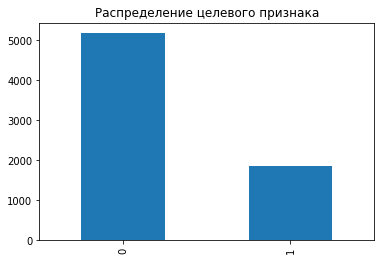

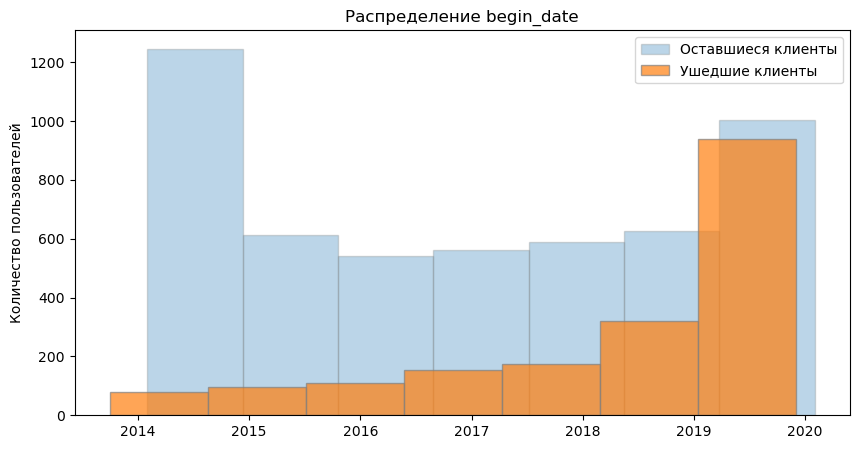
На графиках видно, что большинство ушедших клиентов были относительно новыми, заключившими договор в 2018-2020гг, что вероятно связано с особенностями современных тарифных предложений, большой конкуренцией. Оставшиеся клиенты примерно одинаково распределены по годам начала пользования услугами. Выделяется 2014 год - постоянные клиенты, которые уже привыкли и полюбили компанию и вряд ли уйдут, и 2020 год - новые клиенты (вероятно новогодние скидки и предложения привлекли клиентов и часть не успела уйти)
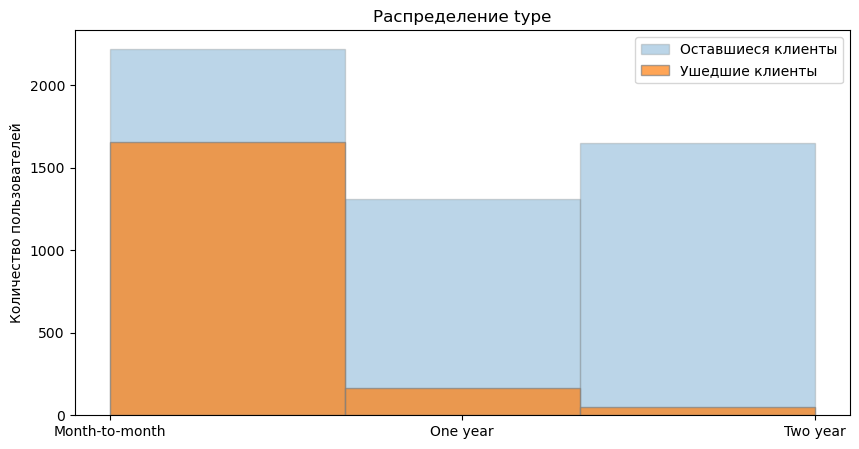
Ушедшие клиенты имели ежемесячный тип оплаты, таким клиентам легче отказаться от услуг, потому что их "не удерживает" потраченная сумма за год или два вперед. Оставшиехся клиентов с ежемесячным типом оплаты примерно столько же, при этом подавляющее большинство с клиентов с типом оплаты за 1 и 2 года относятся к оставшимся клиентам. 
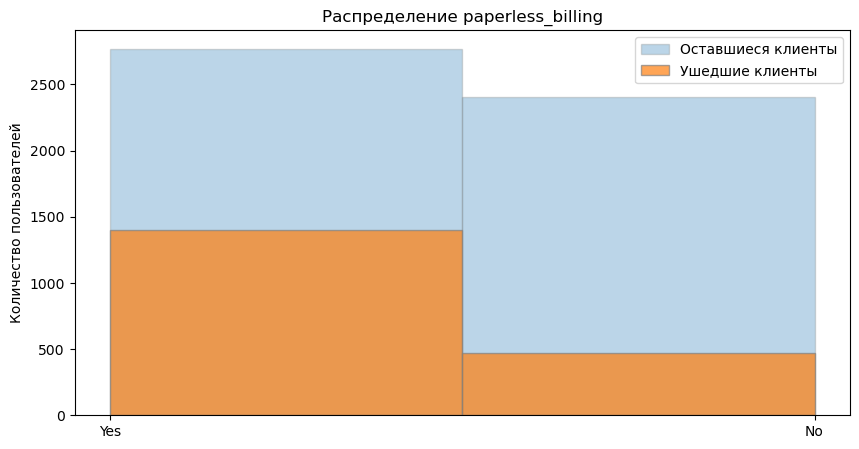
Безначичный расчет есть примерно у половины оставшихся клиентов, при этом ушедшие клиенты в подавляющем большинстве имели возможность безналичного расчета (это скорее всего связано с современным развитием технологий, помним что ушедшие клиенты были в основном "новые").
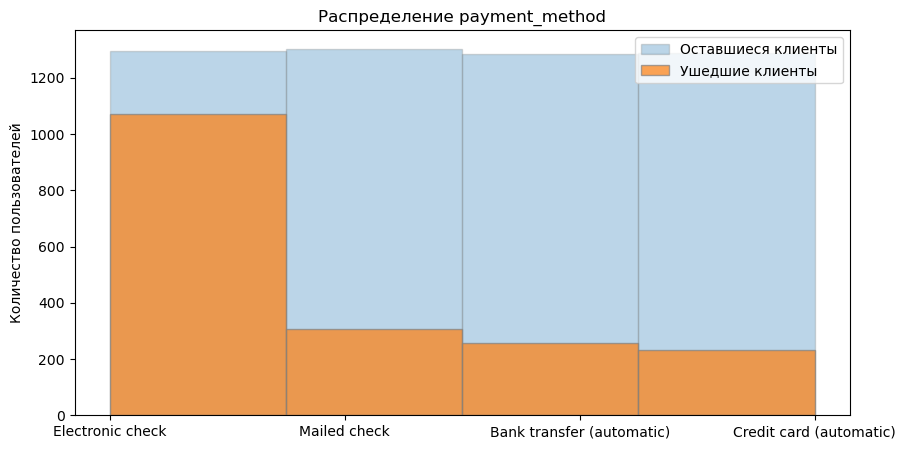
У большинства ушедших клиентов был способ оплаты electronic check. Среди оставшихся клиентов способы оплаты распределены в одинаковых пропорциях.
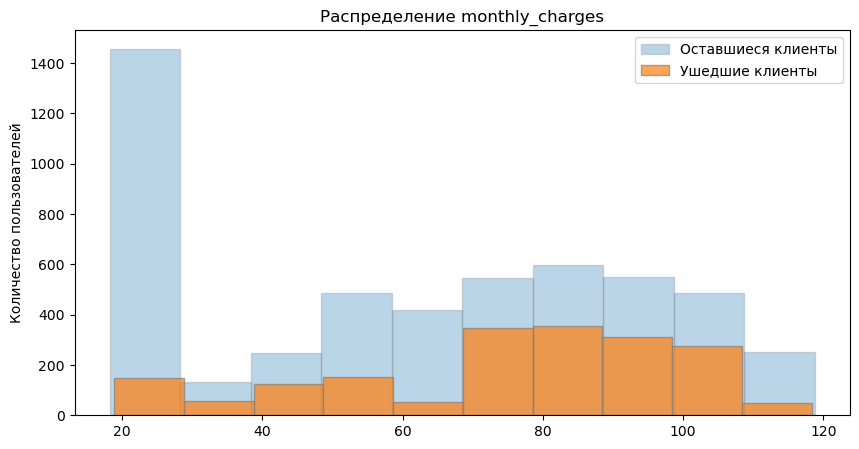
Среди всех клиентов большая часть имела ежемесячную плату 70-110 долларов, однако среди оставшихся клиентов большое количество платили в месяц 20 долларов (довольно логичная мотивация, чтобы остаться).
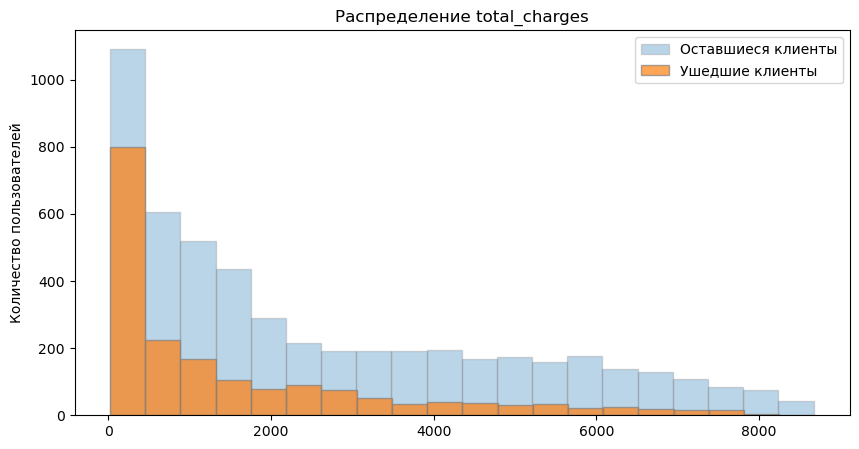
Распределение общей суммы, потраченной на услуги, практически одинаковое в обеих группах. Большинство клиентов сосредоточено в промежутке до 2000 долларов. Однако если рассматривать средние значения в группах, то разница довольно значительная, ушедшие клиенты в среднем заплатили почти на 1000 долларов меньше!
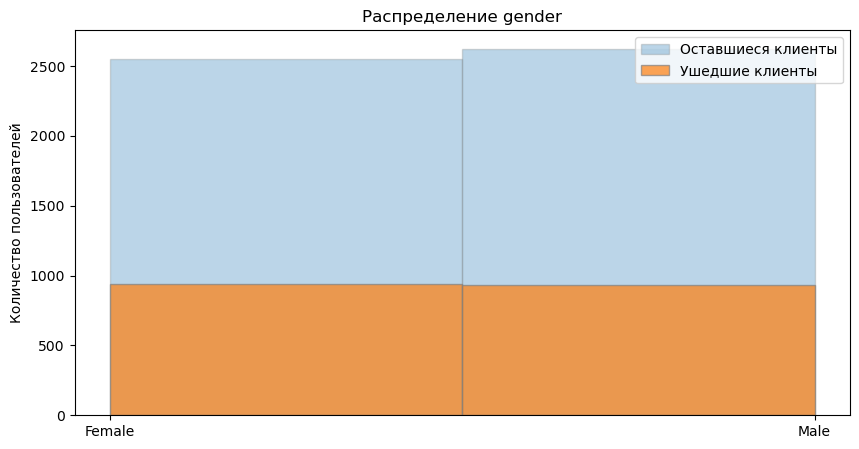
Различий среди клиентов обеих групп по половой принадлежности также не выявлено, примерно одинаковое количество мужчин и женщин. Скорее всего это бесполезный признак, в чем мы убедились на этапе проверки корреляции.
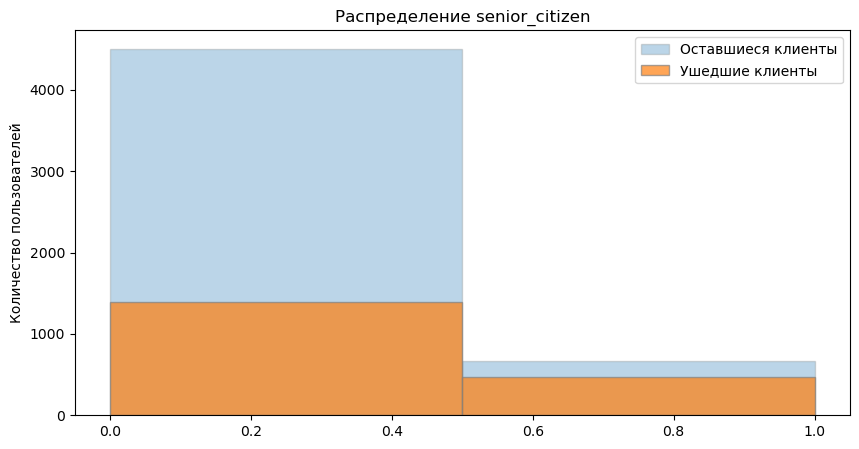
Мы видим, что относительно количество пенсионеров среди ушедших клиентов больше. Это может быть связано и с уходом из жизни, и с более высокой платой (пенсионеру тяжело много тратить на связь).
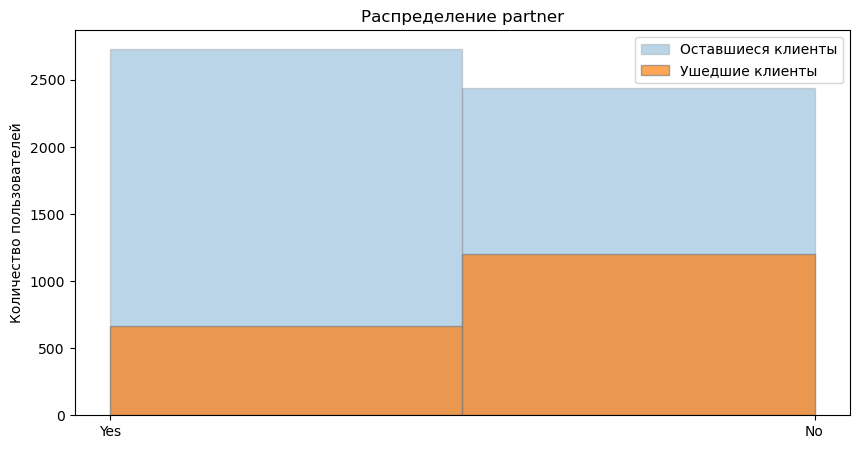
У оставшихся клиентов с небольши но все-таки преимущестовм больше клиентов, имеющих супруга. Среди ушедших клиентов наличие партнера только в половине случаев.
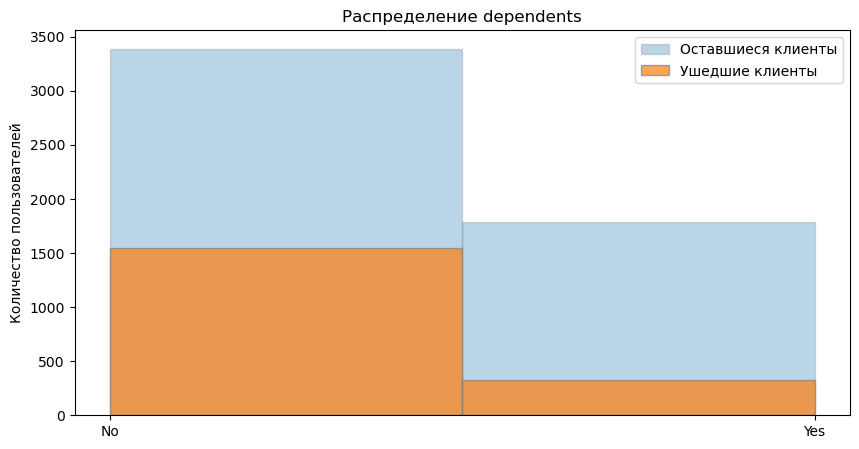
Среди ушедших клиентов гораздо меньше имеющих иждивенцев, чем у оставшихся клиентов.
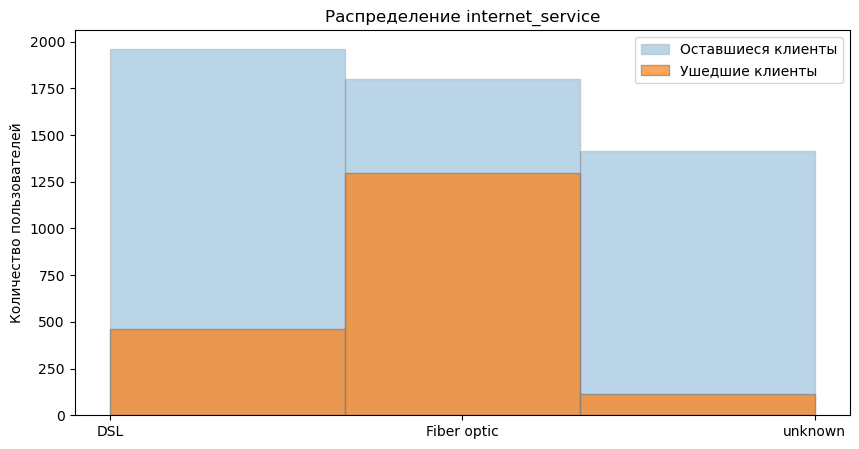
Можно заметить, что у подавляющего большинства ушедших клиентов была услуга Интернет, причем дорогим оптоволокном (возможно это слишком дорого и не оправдывает ожидания). Среди оставшихся клиентов примерно одинаковое количество с оптоволокном, DSL и без услуги Интернет. Очень интересно как распределились клиенты по услуге Телефония, поэтому рассмотри этот показатель вне очереди.
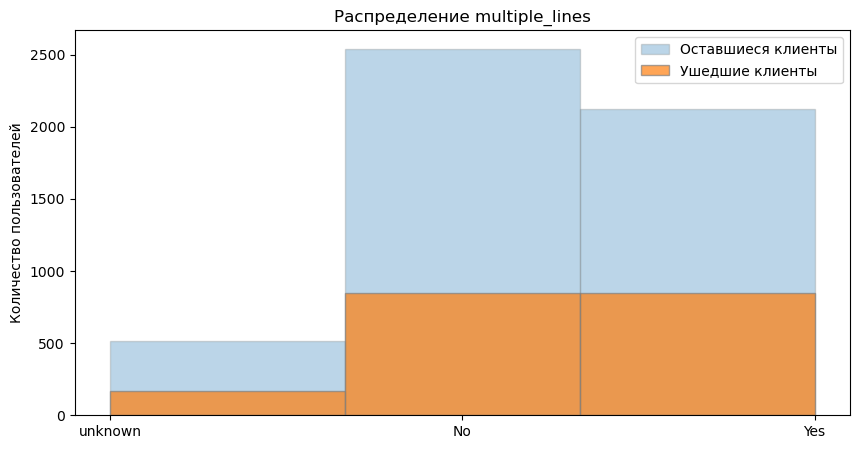
Здесь такой интересной закономерности нет, примерно одинаковое рапределение клиентов с функцие Телефония и без нее, а также наличие возможноти параллельного звонка.
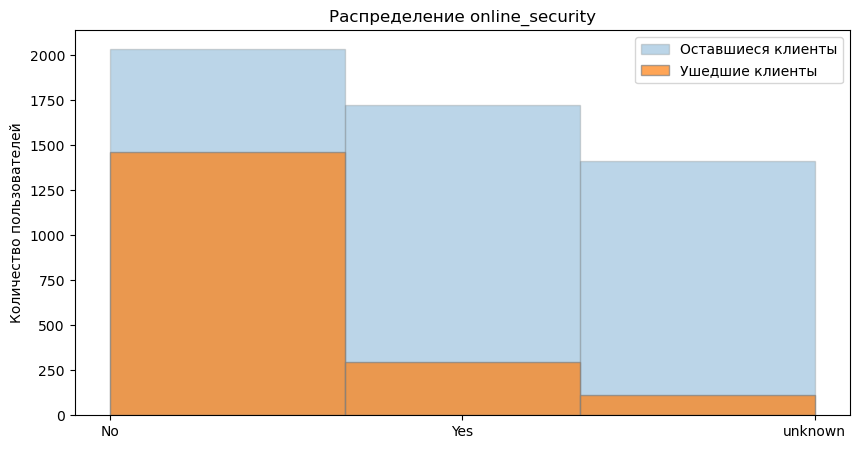
Распределение схожее с показателем *internet_service*. У большинства ушедщих клиентов не было онлайн защиты.
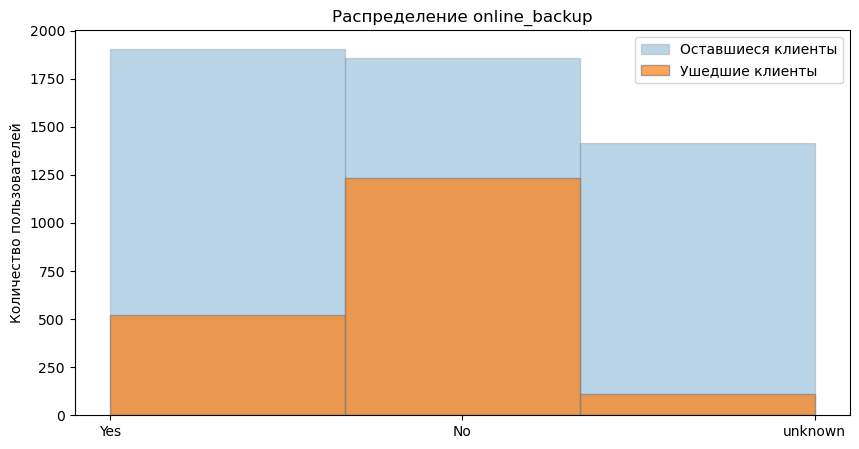
У большинства ушедших клиентов не было функции резервного копирования данных. Среди оставшихся клиентов примерно одинаковое распределение.
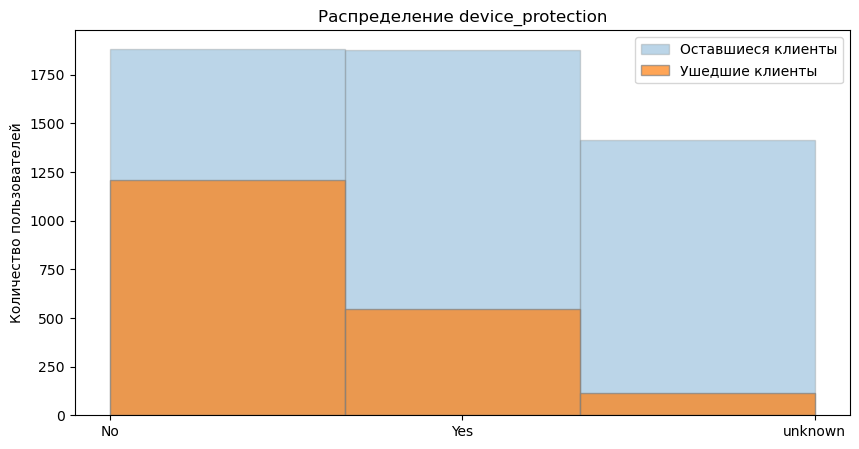
Такая же ситуация была с наличием антивируса - у большинства ушедших клиентов его не было.
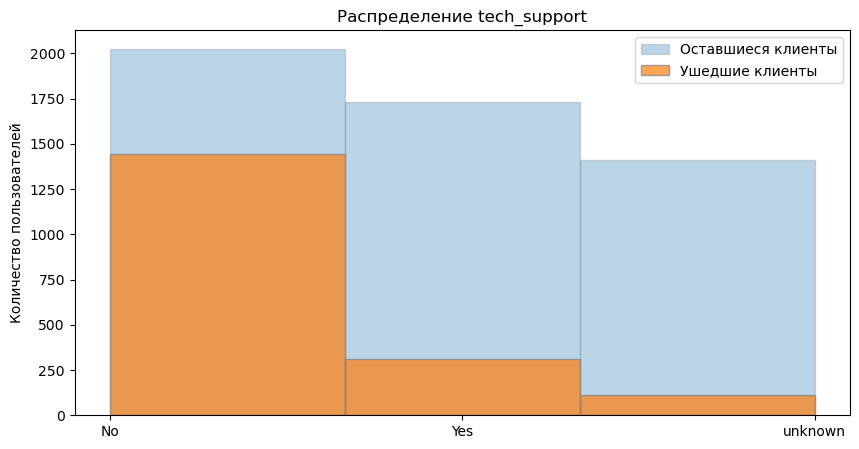
У большинства ушедших клиентов также не было выделенного канала технической поддрежки.
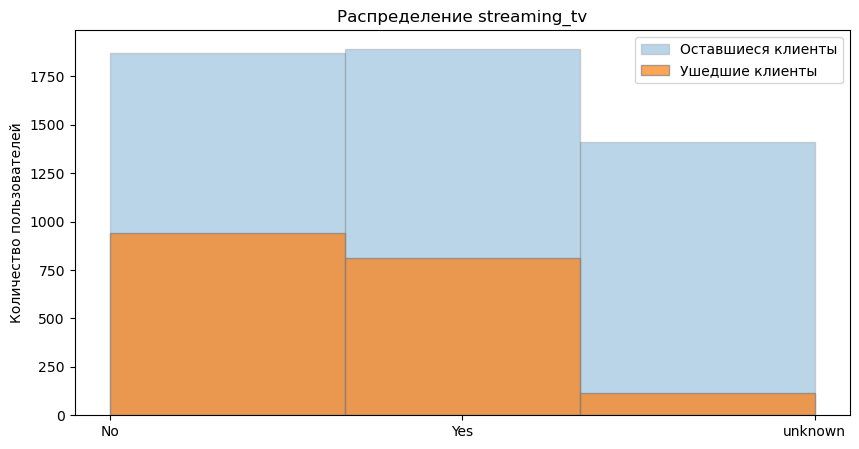
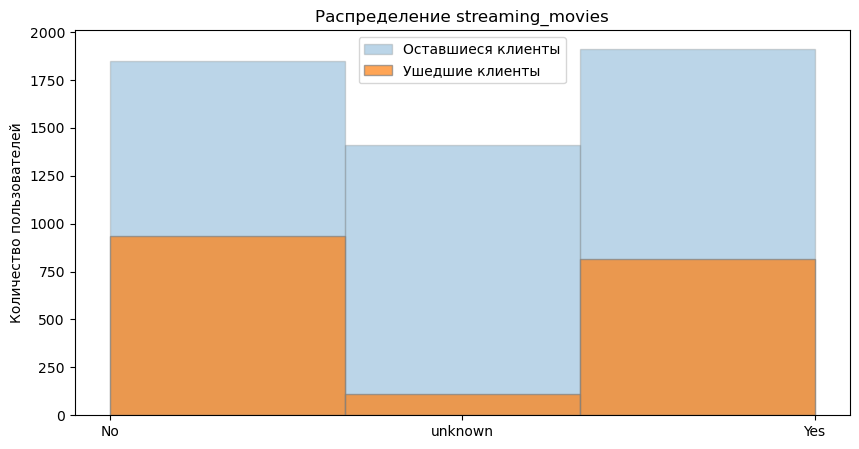
Распределение стриминогово TV и фильмов не имело принципиальных различий среди ушедших и оставшихся клиентов. Наличие данных функций было в половине случаев.

Таким образом, разведывательный анализ данных позволил нам сформировать некий "портрет" стандарного ушедшего пользователя. Это - :
- **новый** клиент (последние 2-3 года)
- с **высокой помесячной** оплатой
- с **высокой общей суммой**, потраченной на услуги
- возможно уже **пенсионер**
- **одинокий и без иждивенцев**
- пользуется дорогим **оптоволоконным интернетом без дополнительных функций** (защина от вредоносных сайтов, антивирус, техподдрежка).   

В целом, отток клиента, как бы банально это не звучало, зависит от цены услуги, с которой тем или иным образом связаны выявленные закономерности в данных.

**Feature engineering**

Мы добавили следующие признаки:
- *active_period* - время, которое прошло с момента пользования ислугами компаниями для каждого пользователя в месяцах. Ушедшие клиенты пользовались услугами по времени в среднем в 2 раза меньше, около 1,5 лет.
- *payment_benefit* - разница между ежемесячной платой и фактически потраченными средствами.
- *year* - извлеченный из *begin_date* год.
- *sum* - произведение *year* * *monthly_charges*
- *sum_services* - количество подключенных интернет опций

**Оценка корреляции и отбор показателей**

Для оценки корреляции и мультиколлинеарности мы воспользовались библиотекой **Phik**, преимущества которой заключются в возможности работы с категориальными признаками. Матрица корреляции представлена в ввиде графика
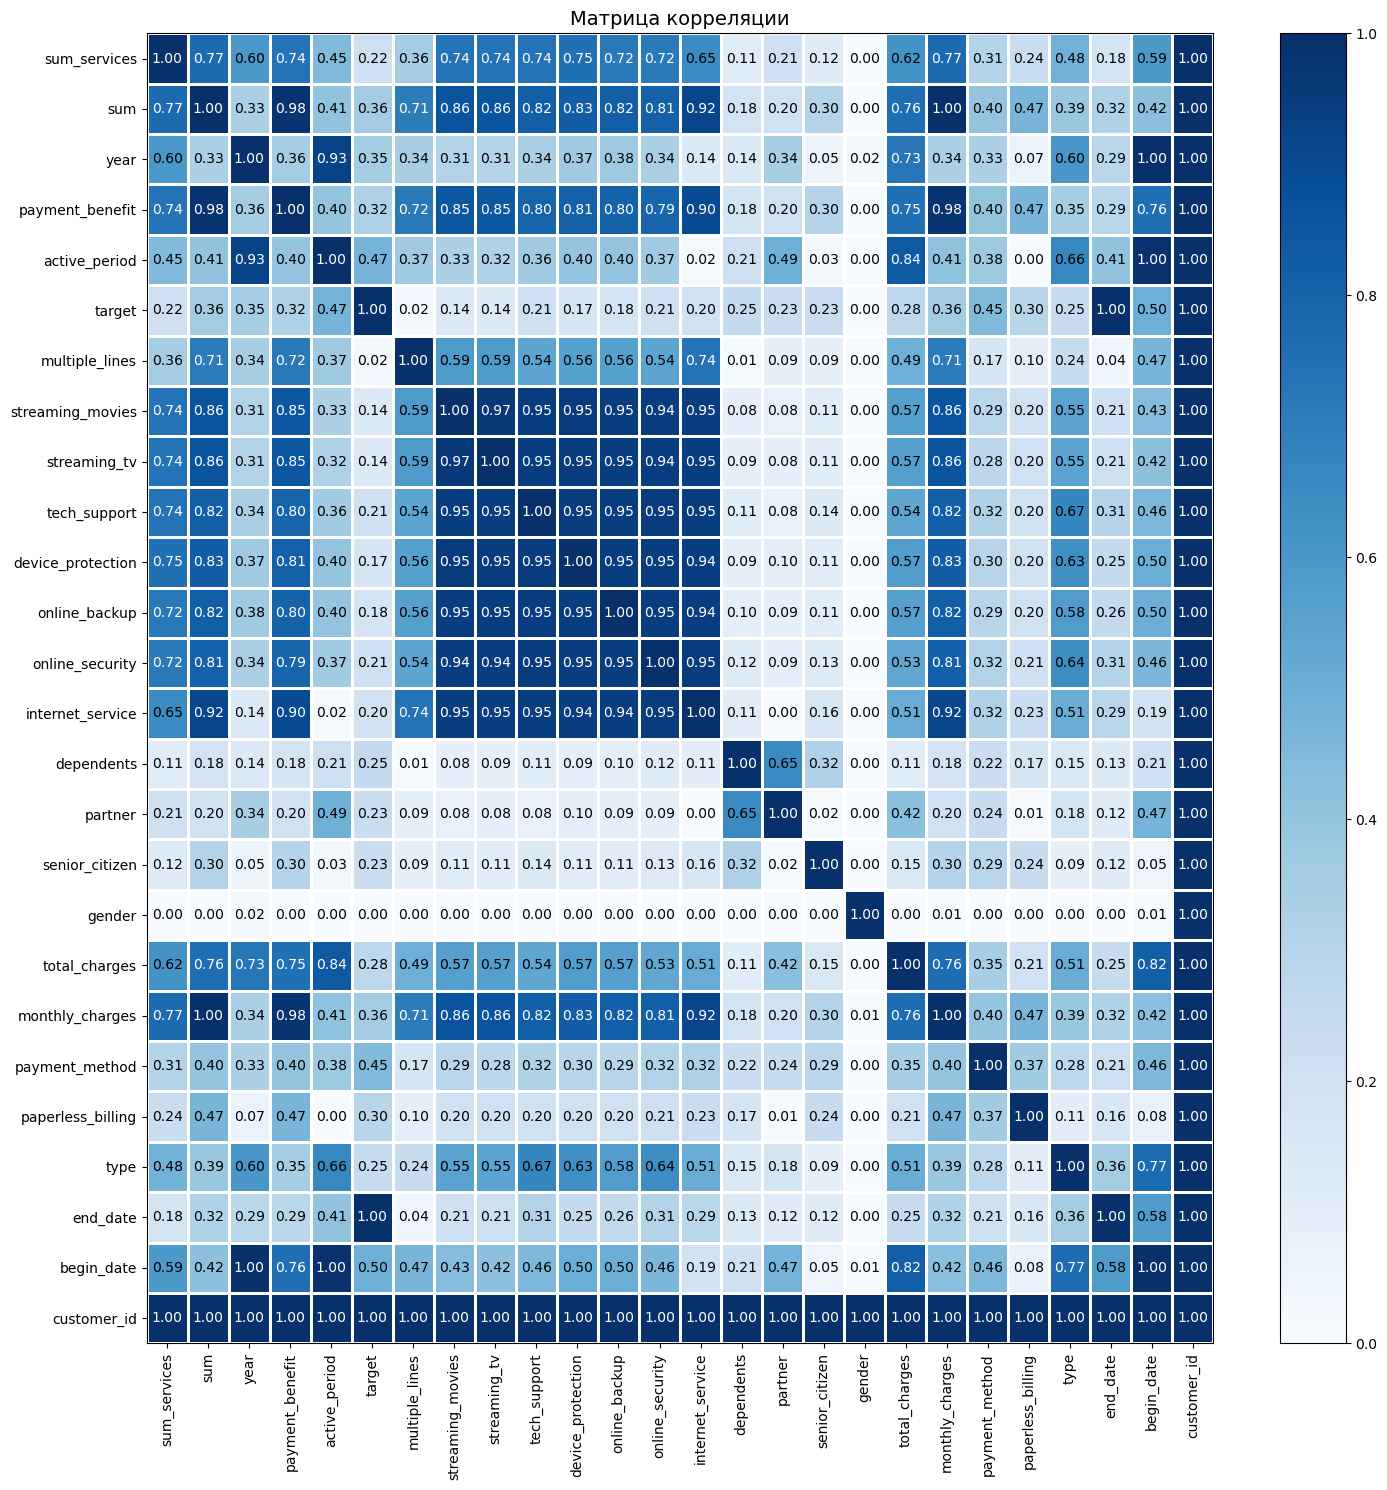
На полученном графике видно, что с *таргетом* имеет высокую корреляцию показатель *end_date*. Это абсолютно логично, мы получили таргет закодировав данный признак. Поэтому *end_date*, равно как и *begin_date* (модели не смогут обработать время) мы удалим. Среди прочих признаков наибольшая корреляция с таргетом у *active_period* = 0.47 и *payment_method* = 0.45. Наименьшая корреляция у показателей *gender* = 0.0 и, что довольно странно, *multiple_lines* = 0.02. Получается что клиентов с телефонией абсолютно никак "не волнует" и не привлекает наличие возможности отвечать на параллельный звонок. Также никакой смысловой нагрузки при обучении моделей не имеет столбец с идентификаторами пользователей. Данные признаки были удалены!

В плане мультиколлинеарности обращает на себя внимание блок связанный с интернет сервисом. Почти все параметры имеют корреляцию 0.94-0.94. Среди данных показателей наибольшая корреляция с таргетом у *online_security* и *tech_support* - 0.21. Поэтому среди показателей связанных с интернетом оставим, например, только *online_security*.

Таблица корреляции выглядит более привлекательно, нет избыточной зависимости с таргетом и мультиколлинеарности!
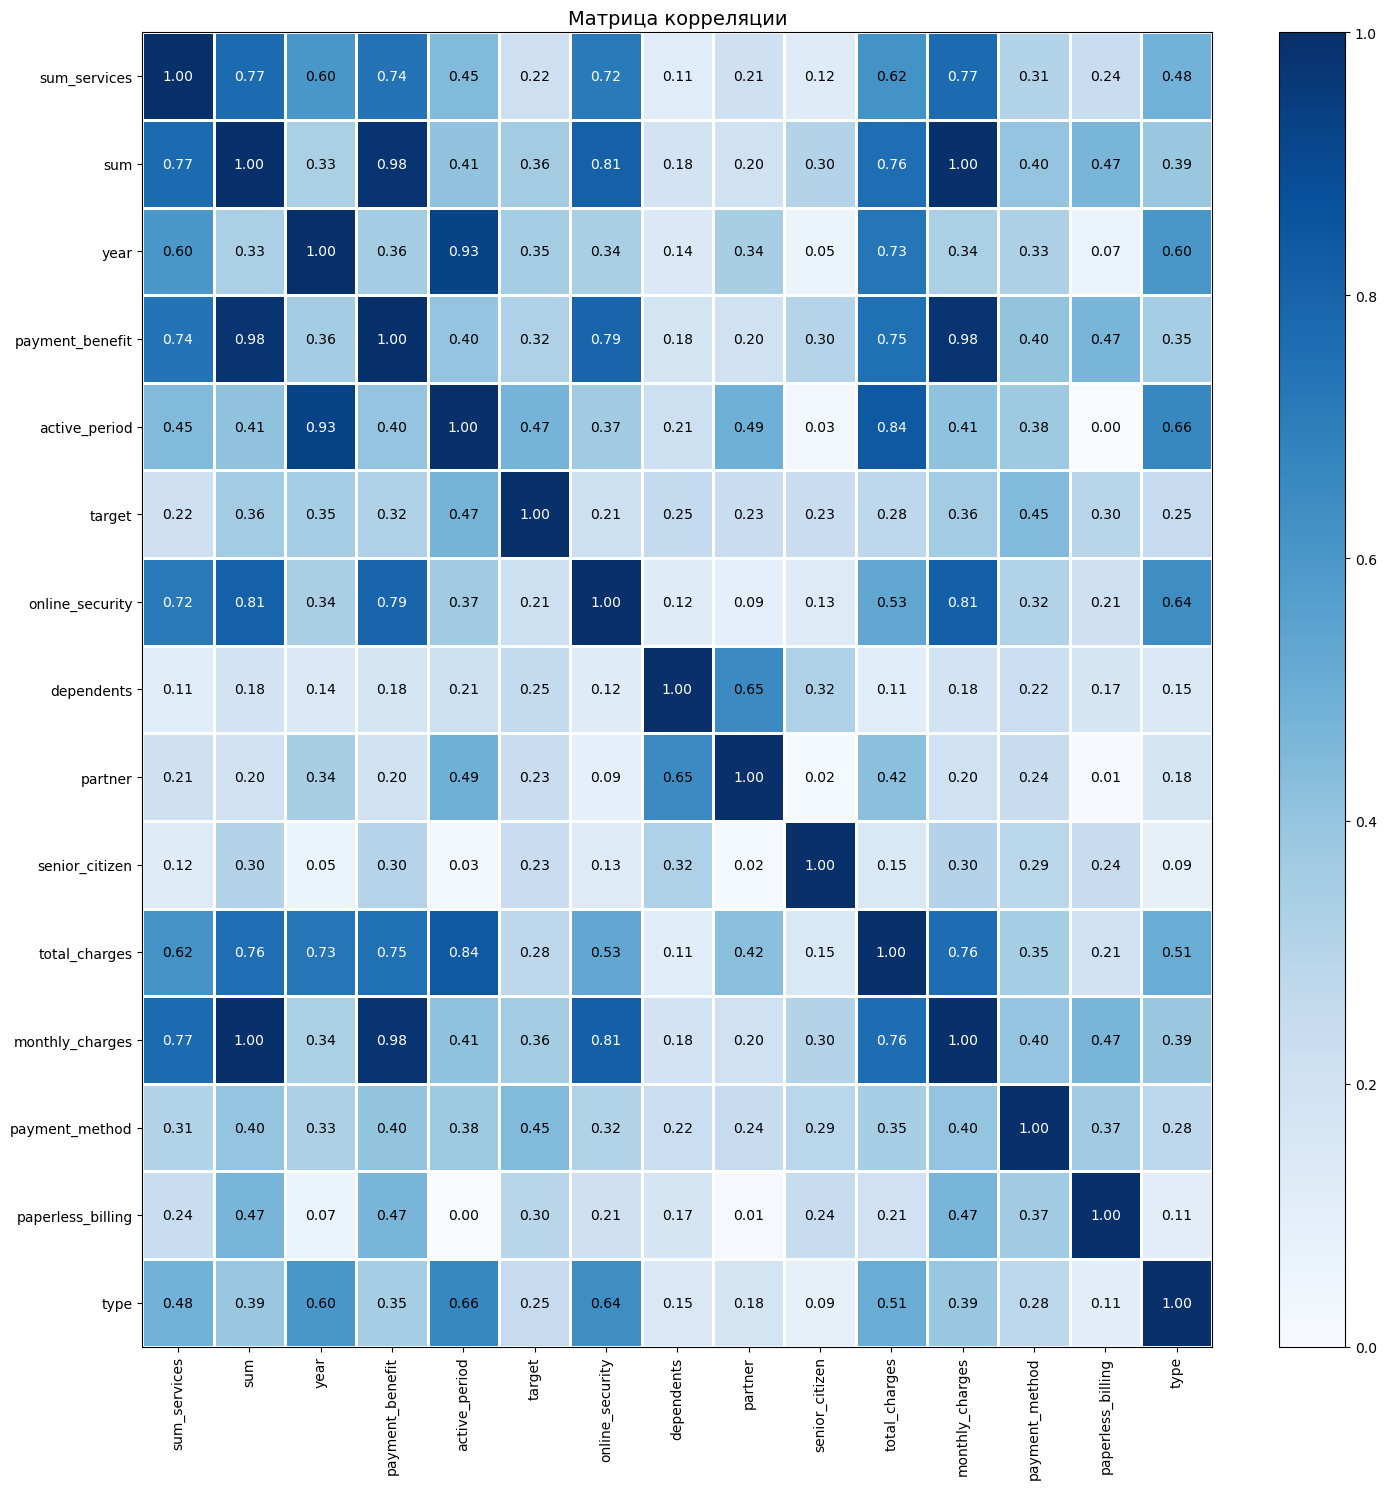

**Исследование моделей и подбор гиперпараметров**

На данном итапе мы использовали *Pipeline* для автоматизации процесса предобработки данных перед обучением модели. Для подбора гиперпараметров воспользовались автоматическими методами, в нашем случае *RandomizedSearchCV*.

- масштабирование чиловых данных проведено при помощи *StandardScaler*
- кодирование категориальных признаков выполнено при поомощи *OrdinalEncoder*
- кодирование бинарных признаков выполнено при помощи *OneHotEncoder*
- для устранения дисбаланса классов использовали *SMOTETomek*
- выбор наилучших фичей  осуществлен при помощи *SelectKBest*

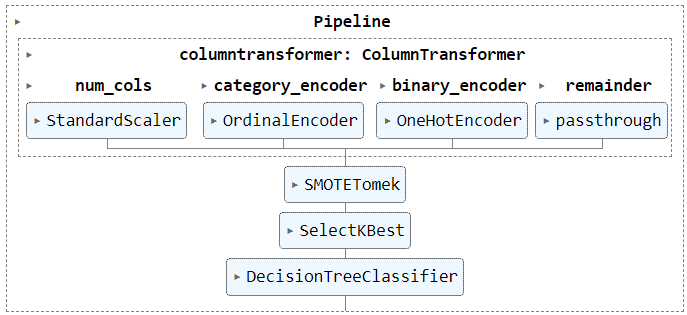

**DecisionTreeClassifier**

Данная модель показала следующие параметры работы
- Значение ROC_AUC = 0.871
- Значение Accuracy = 0.822
- Значение F1 = 0.697
- Лучшие параметры модели: {'feature_select__k': 10, 'clf__min_samples_split': 7, 'clf__min_samples_leaf': 1, 'clf__max_depth': 8, 'clf': DecisionTreeClassifier(max_depth=8, min_samples_split=7, random_state=270323)}
- CPU times: total: 2.06 s
- Wall time: 28.3 s

**RandomForestClassifier**

Данная модель показала следующие параметры работы
- Значение ROC_AUC = 0.886
- Значение Accuracy = 0.822
- Значение F1 = 0.703
- Лучшие параметры модели: {'feature_select__k': 5, 'clf__n_estimators': 90, 'clf__min_samples_split': 2, 'clf__min_samples_leaf': 2, 'clf__max_depth': 8, 'clf': RandomForestClassifier(max_depth=8, min_samples_leaf=2, n_estimators=90, random_state=270323)}
- CPU times: total: 2.53 s
- Wall time: 38.2 s

**LGBMClassifier**

Данная модель показала следующие параметры работы

- Значение ROC_AUC = 0.941
- Значение Accuracy = 0.924
- Значение F1 = 0.857
- Лучшие параметры модели: {'feature_select__k': 10, 'clf__min_data_in_leaf': 19, 'clf__max_depth': 9, 'clf__learning_rate': 0.1, 'clf': LGBMClassifier(max_depth=9, min_data_in_leaf=19, random_state=270323)}
- CPU times: total: 3.03 s
- Wall time: 29.9 s

**CatBoostClassifier**

Данная модель показала следующие параметры работы

- Значение ROC_AUC = 0.913
- Значение Accuracy = 0.89
- Значение F1 = 0.799
- Лучшие параметры модели: {'feature_select__k': 9, 'clf__max_depth': 12, 'clf__learning_rate': 0.1, 'clf__iterations': 150, 'clf': <catboost.core.CatBoostClassifier object at 0x00000247C1493070>}
- CPU times: total: 1min 32s
- Wall time: 1min 34s

В ходе исследования нами было оценено 4 модели для прогнозирования оттока клиентов. Наилучшие показатели (время обучения, время предсказания и качество предсказания) оказались у модели **LGBMClassifier**. Именно данная модель будет представлена заказчику!

| Модель                | ROC_AUC      | Accuracy | F1      | 
| :---:                 |    :----:    |   :---:  | :---:   |
| DecisionTreeClassifier|   0.870      | 0.822    | 0.697   |
| RandomForestClassifier|   0.884      | 0.829    | 0.714   |
| **LGBMClassifier**    | **0.941**    |**0.924** |**0.857** |
| CatBoostClassifier    | 0.911        | 0.890    | 0.799    |     



Проверим работу модели на тестовых данных!

- Значение ROC_AUC на лучшей модели = 0.942
- Значение Accuracy на лучшей модели = 0.888
- Значение F1 на лучшей модели = 0.788

Оценка важности признаков показала, что для модели наиболее важными признаками были *payment_method*, *type*, *onlyne_security*, *active_period*. Поэтому заказчику стоит обратить внимание на характеристики особенности клиентов.
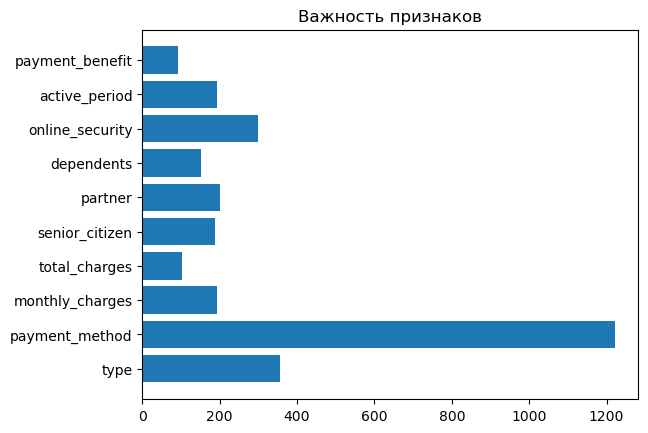

Таким образом, нами выполнено техническое задание - мы построили модель прогнозирования ухода клиентов с точностью предсказания 88%. Показатель ROC_AUC составил 0.942, что свидетельстует о высокой специфичности и чувствительности модели (мы предсказываем почти всех уходящих клиентов и в тоже время редко обозначаем клиента,который останется, как уходящего).

В качестве рекомендаций бизнесу можно порекомендовать обратить внимание на характеристики пользователей, которые вошли в модель и имели наибольшую важность:
- оптимизировать методы оплаты
- уделять внимание клиентам, длительность контракта которых подходит к 1,5 годам 
- оптимизировать предоставление услуги Интернет. Многие пользователи вероятно не довольны данной услугой (дорого или плохое качество)
- предоставлять особые предложения пенсионерам, которые также подвержены частому уходу